# Agrupamiento con PCA

In [1]:
# Importar las librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder

In [2]:
# Cargar el Dataset de Raisin
archivo_csv = 'C:/Users/S ALBERT FC/Documents/ESCOM/5° semestre/Aprendizaje Maquina/raisin.csv'
data = pd.read_csv(archivo_csv, delimiter=',')

In [3]:
# Mostrar las primeras filas del dataset
print(data.head())

    Area  MajorAxisLength  MinorAxisLength  Eccentricity  ConvexArea  \
0  87524       442.246011       253.291155      0.819738       90546   
1  75166       406.690687       243.032436      0.801805       78789   
2  90856       442.267048       266.328318      0.798354       93717   
3  45928       286.540559       208.760042      0.684989       47336   
4  79408       352.190770       290.827533      0.564011       81463   

     Extent  Perimeter    Class  
0  0.758651   1184.040  Kecimen  
1  0.684130   1121.786  Kecimen  
2  0.637613   1208.575  Kecimen  
3  0.699599    844.162  Kecimen  
4  0.792772   1073.251  Kecimen  


In [4]:
# Definir las caracteristicas
X = data.iloc[:, :-1]  
y = data.iloc[:, -1] 
    
# Convertir las clases de texto (Kecimen, Besni) a numeros
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [5]:
# Media
X_mean = X.mean()
print('Media de las caracteristicas:\n', X_mean)

# Desviacion estandar
X_std = X.std()
print('Desviacion estandar de las caracteristicas:\n', X_std)

# Estandarizacion (Z-score normalization)
Z = (X - X_mean) / X_std
print('Datos estandarizados:\n', Z.head())

Media de las caracteristicas:
 Area               87804.127778
MajorAxisLength      430.929950
MinorAxisLength      254.488133
Eccentricity           0.781542
ConvexArea         91186.090000
Extent                 0.699508
Perimeter           1165.906636
dtype: float64
Desviacion estandar de las caracteristicas:
 Area               39002.111390
MajorAxisLength      116.035121
MinorAxisLength       49.988902
Eccentricity           0.090318
ConvexArea         40769.290132
Extent                 0.053468
Perimeter            273.764315
dtype: float64
Datos estandarizados:
        Area  MajorAxisLength  MinorAxisLength  Eccentricity  ConvexArea  \
0 -0.007182         0.097523        -0.023945      0.422906   -0.015700   
1 -0.324037        -0.208896        -0.229165      0.224352   -0.304079   
2  0.078249         0.097704         0.236856      0.186136    0.062079   
3 -1.073689        -1.244359        -0.914765     -1.069028   -1.075567   
4 -0.215274        -0.678581         0.726949   

In [6]:
# Aplicar PCA con 2 componentes
pca = PCA(n_components=2)
pca.fit(Z)
x_pca = pca.transform(Z)

# Crear un nuevo DataFrame con los componentes principales
df_pca = pd.DataFrame(x_pca, columns=['PC1', 'PC2'])

print(df_pca)

          PC1       PC2
0    0.076951  0.453076
1   -0.475112 -0.445121
2    0.371902 -0.801562
3   -2.620988  0.302395
4   -0.961519  2.966114
..        ...       ...
895 -0.114565 -0.694259
896  0.273425 -0.953404
897  0.682072  1.307472
898  0.648049 -0.978704
899  0.487284 -2.106945

[900 rows x 2 columns]


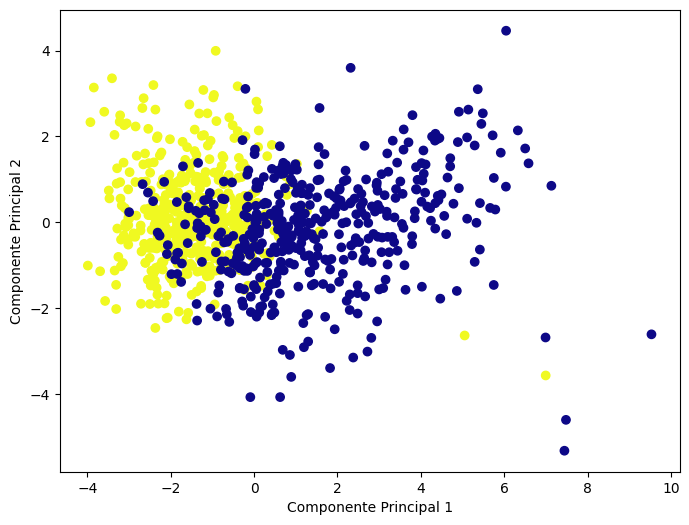

Componentes principales:
 [[ 0.44828422  0.4432398   0.38938118  0.20297098  0.45093833 -0.05636836
   0.45082374]
 [ 0.11609991 -0.13658724  0.37492246 -0.61082321  0.08761633  0.66734439
  -0.03417227]]


In [9]:
# Visualizacion de los componentes principales
plt.figure(figsize=(8, 6))
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=y_encoded, cmap='plasma')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.show()

# Mostrar los componentes principales
print('Componentes principales:\n', pca.components_)